In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from tqdm import tqdm
from timeit import default_timer as timer

# Intro to ML
## Ex0



### 1. Algebra, Random variables

$ \Omega = $ The sample space (the set of outcomes)  
$ \omega = $ The outcome  
$ P(\omega) >0 = $ The probability of an outcome  
$ \sum_{\omega \in \Omega} P(\omega) = 1 $ So sum of probabilities is 1  

$ X = $ a real-valued random variable (satunnaismuuttuja)  

$ X(\omega) $ creates a mapping between real numbers and the possible outcomes

#### a)
An operator $L$ is linear if it obeys:
$$ L ( x + y ) = L x + L y $$
where $ x,y $ are eg. functions

and 
$$ L (\lambda x) = \lambda L x $$
where $\lambda \in \Re$ 

Show that the operator $E$ is linear:

$E[X(\omega)] = \sum_{\omega} P(\omega)X(\omega)$

$$ \begin{align}
E[F(\omega) + G(\omega)] &= \sum_{\omega} P(\omega) \left(F(\omega) + G(\omega)\right) \\
E[F(\omega) + G(\omega)] &= \sum_{\omega} P(\omega) F(\omega) + \sum_{\omega} P(\omega) G(\omega) \\
E[F(\omega) + G(\omega)] &= E [F(\omega)] + E [G(\omega)] \\\\
E[F + G] &= E [F] + E [G] \\
\end{align} $$

and:  
$$ \begin{align}
E[cF(\omega)] &= \sum_{\omega} P(\omega)cF(\omega) \\
E[cF(\omega)] &= c\sum_{\omega} P(\omega)F(\omega) \\
E[cF(\omega)] &= cE[F(\omega)] \\
\end{align} $$

$ \mathrm{Var}[X(\omega)] = E[(X(\omega) - E[X(\omega)])^2] $

#### b)

$$ \begin{align}
\mathrm{Var}[X] &= E[(X - E[X])^2] \\
\mathrm{Var}[X] &= E[X^2 - 2XE[X] + E[X]^2] \\
\mathrm{Var}[X] &= E[X^2] - E[2XE[X]] + E[E[X]^2] \\
\mathrm{Var}[X] &= E[X^2] - 2E[X]E[X] + E[X]^2 \\
\mathrm{Var}[X] &= E[X^2] - 2E[X]^2 + E[X]^2 \\
\mathrm{Var}[X] &= E[X^2] - E[X]^2 \\
\end{align} $$

Here $E[X]$ is the expectation value ie. a number so eg. $E[2XE[X]]=2E[X]E[X]$ works

### 2. Bayes Rule

#### a) Derivation

The probability of event $A$ given $B$ is:

$$ P(A|B) = \frac{P(A \cap B)}{P(B)} $$

The probability of event $B$ given $A$ is:

$$ P(B|A) = \frac{P(B \cap A)}{P(A)} $$

Noting that: $$P(B \cap A) = P(A \cap B)$$
We get: $$ P(A|B) P(B) = P(B|A) P(A) $$

Rearranging gives Bayes: $$ P(A|B) = \frac{P(B|A) P(A)}{P(B)} $$

#### b) Medical test

$A = $ allergy  
$\neg A = $ no allergy  
$T = $ positive test  
$\neg T = $ negative test

false positive in 1 % of the cases:
$$ P(T|\neg A)=0.01 $$

false negative in 10 % of the cases:
$$ P(\neg T|A)=0.1 $$

15 % of the population in Finland have allergy:
$$ P(A) = 0.15 $$
$$ P(\neg A) = 0.85 $$

the probability that a person is allergic, if the test is positive:
$$ P(A|T) = \frac{P(A \cap T)}{P(T)} $$
$$ P(A|T) = \frac{P(T|A) P(A)}{P(T)} $$

Write: 
$$ P(T) = P(A \cap T) + P(\neg A \cap T) $$
$$ P(T) = P(T | A)P(A) + P(T | \neg A) P(\neg A) $$

Bayes with the marginal:
$$ P(A|T) = \frac{P(T|A) P(A)}{P(T | A)P(A) + P(T | \neg A) P(\neg A)} $$

|            | $ A $  | $ \neg A $ | SUM  |
|------------|--------|------------|------|
| $ T $      |        | 0.01       |      |
| $ \neg T $ | 0.1    |            |      |
| SUM        | 0.15   | 0.85       | 1    |

|            | $ A $  | $ \neg A $ | SUM  |
|------------|--------|------------|------|
| $ T $      | 0.05   | 0.01       | 0.06 |
| $ \neg T $ | 0.1    | 0.84       | 0.94 |
| SUM        | 0.15   | 0.85       | 1    |

Bayes with the marginal:
$$ \begin{align}
P(A|T) &= \frac{0.05 \times 0.15}{0.05 \times 0.15 + 0.01 \times 0.85} \\
P(A|T) &= 0.46875 
\end{align}$$

### 3. Matrix calculus

Matrix $ \mathrm{A} \in \mathbb{R}^{n\times n} $  
Eigenvalue $\lambda \in \mathbb{R} $ of $\mathrm{A}$   
Eigenvector $ x \in \mathbb{R}^n $ if  
Eigenfunction $ \mathrm{A}x = \lambda x $

$\mathrm{A}$ has $n$ orthonormal eigenvectors $x_i \in \mathbb{R}^n $  
and corresponding eigenvalue $\lambda_i \in \mathbb{R} $  
where $i \in [1,n] $

Orthonormality means:  
$x_i^\top x_i = 1$ and  
$x_i^\top x_j = 0$ if $i≠j$  

A new matrix:  
$ \mathrm{B} = \sum_{j=1}^n \lambda_j x_j x_j^\top $ "spectral decomposition"  

A matrix $\mathrm{A}$ can be expressed in the basis of it's eigenvectors $X = [x_1 + x_2 + … + x_n]$ and $X^\top$ 
$$ \mathrm{A} = X\Lambda X^\top $$
where $\Lambda$ is a diagonal matrix with $\mathrm{Tr}(\Lambda) = \sum_i^n \lambda_i $

$$ \mathrm{A} = \begin{pmatrix} 
\uparrow & \uparrow &  & \uparrow \\
x_1 & x_2 & \dots & x_n \\
\downarrow & \downarrow & & \downarrow \\
\end{pmatrix} \begin{pmatrix} 
\lambda_1 & & & 0 \\
 & \lambda_2 & & \\
 & & \ddots & \\
0 & & & \lambda_n \\
\end{pmatrix} \begin{pmatrix} 
\leftarrow & x_1 & \rightarrow \\
\leftarrow & x_2 & \rightarrow \\
\leftarrow & \vdots & \rightarrow \\
\leftarrow & x_n & \rightarrow \\
\end{pmatrix} $$

Multiplying the matrices yields $ \mathrm{A} = \sum_{i=1}^n \lambda_ix_ix_i^\top $ 
Hence $ \mathrm{A} = \mathrm{B} $ and the eigenvectors and -values are the same for $\mathrm{B}$ as well.

### 4. Optimization

Constants:  
$a \in \mathbb{R}$  
$b \in \mathbb{R}$  
$c \in \mathbb{R}$  

A function:  
$$ \begin{align}
f(x) &= ax^4 + bx + c \\
f'(x) &= 4ax^3 + b \\ 
\end{align} $$ 

#### a)
The extreme values are found when $ f'(x) =0 $

$$ \begin{align}
4ax^3 + b &= 0 \\
4ax^3 &= -b \\
x^3 &= \frac{-b}{4a} \\
x &= \sqrt[\leftroot{2}3]{\frac{-b}{4a}} \\
\end{align} $$ 

#### b)
Conditions: $a≠0$ and none of them can go to the infinity (and beyond)

### 5. Algorithms

The fibonacci numbers $F(i)$ are defined for $i\in \mathbb{N}$ as:  
$F(i+2)=F(i+1)+F(i)$ when $F(1)=F(2)=1$

Pseudocode for producing fibonacci numbers

```python
func fibo(n) {
    i = 1
    j = 1
    for k in [1,n + 1] {
        i = j
        j = i + j
        print j
    }
}
```

In [1]:
def fibo1(n):
    """Function to calculate values from fibonacci sequence using recursion. Scales O(2^n)"""
    if n<= 1: return n
    else: return fibo1(n-1)+fibo1(n-2)

In [2]:
def fibo2(n):
    """Function to calculate valuesfrom fibonacci sequence. Scales """
    return int(((1+sqrt(5))**n-(1-sqrt(5))**n)/(2**n*sqrt(5)))

In [14]:
length = 50

In [15]:
idx = np.arange(length)

In [32]:
fibo1_df = pd.DataFrame(index=idx,columns=["Time","F"])
fibo1_list = []
fibo1_times = []

In [33]:
for n in tqdm(range(length)):
    start = timer()
    fibo1_list.append(fibo1(n))
    end = timer()
    time = end - start
    fibo1_times.append(time)

100%|██████████| 50/50 [3:11:21<00:00, 2436.57s/it]


In [34]:
fibo1_df["F"]=fibo1_list
fibo1_df["Time"]=fibo1_times

Text(0, 0.5, 'Time')

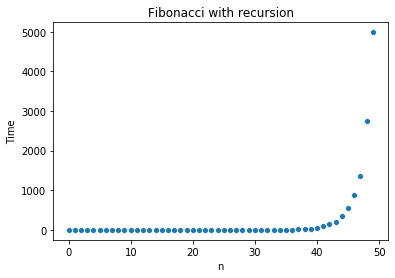

In [44]:
sns.scatterplot(x=idx,y=fibo1_df.Time)
plt.title("Fibonacci with recursion")
plt.xlabel("n")
plt.ylabel("Time")

So it almost doubles the time every time  
Well the big-O is the worst case scenario here (not like one usually thinks)

In [23]:
fibo2_df = pd.DataFrame(index=idx,columns=["Time","F"])
fibo2_list = []
fibo2_times = []

In [24]:
for n in tqdm(range(length)):
    start = timer()
    fibo2_list.append(fibo2(n))
    end = timer()
    time = end - start
    fibo2_times.append(time)

100%|██████████| 50/50 [00:00<00:00, 9364.79it/s]


In [25]:
fibo2_df["F"]=fibo2_list
fibo2_df["Time"]=fibo2_times

Text(0, 0.5, '')

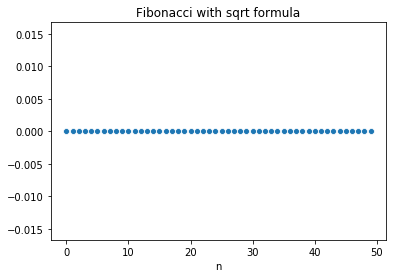

In [27]:
sns.scatterplot(x=idx, y=fibo2_df.Time)
plt.title("Fibonacci with sqrt formula")
plt.xlabel("n")
plt.ylabel("Time")

This follows basically $O(1)$ scaling

### 6. Data analysis

In [37]:
x_data = pd.read_csv("x.csv")
x_data.sample(4)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
708,-4.597123,-4.220368,7.404075,-4.136433,5.526760,-1.680865,7.044002,-8.015283,9.297815,-3.571738,...,5.463083,9.905881,-5.531619,2.962811,4.543958,0.329094,-0.984074,10.878243,-7.286457,4.564651
704,-5.544900,-4.872460,5.765845,-4.165147,7.296932,-1.894360,7.509021,-8.786945,9.225936,-3.702628,...,6.050578,8.834893,-6.292651,1.993986,4.971654,0.204489,-2.545216,9.216210,-8.079275,3.894218
931,-1.741200,-1.065827,7.687956,-2.579892,7.887600,-0.035358,6.411963,-5.078061,10.876653,-2.073567,...,8.095073,9.220010,-2.428004,4.771018,7.195971,1.969682,0.557052,9.199701,-4.508994,5.568834
877,-1.234139,-0.703955,8.137113,-5.114361,7.608299,-2.379770,7.233044,-4.648962,8.416127,-4.395339,...,8.194823,9.386798,-2.122099,0.388631,2.813303,-0.513269,-0.458814,10.299636,-4.044425,5.503309


In [38]:
x_data.shape

(1000, 32)

In [39]:
x_data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-5.493603,-4.848361,6.748369,-3.592207,5.432545,-1.009983,7.413710,-8.719993,9.960414,-2.946698,...,6.094516,9.335113,-6.142262,2.248137,4.818357,0.931852,-1.616505,8.050735,-8.071991,3.578475
std,1.860624,1.868029,1.002521,1.798006,1.561889,1.801655,1.046742,1.865944,1.804349,1.799859,...,1.674089,1.268626,1.859545,1.337806,1.635645,1.798336,1.156287,1.770833,1.862662,1.358550
min,-12.051620,-11.449646,3.402454,-9.883042,0.650691,-7.255290,4.310664,-15.279431,3.734125,-9.020557,...,1.611459,5.204230,-12.749604,-3.278114,-0.739790,-5.075948,-5.206253,2.643104,-14.815176,-0.315946
25%,-6.720468,-6.091409,6.098733,-4.771207,4.390488,-2.164160,6.711508,-9.956209,8.776543,-4.128711,...,4.972834,8.446042,-7.368436,1.331221,3.739524,-0.238144,-2.327219,6.879330,-9.286904,2.617058
50%,-5.483653,-4.871369,6.761059,-3.571100,5.406136,-0.987092,7.408101,-8.722366,9.977579,-2.922840,...,6.047539,9.362192,-6.169750,2.262545,4.829498,0.960550,-1.600126,8.106984,-8.071962,3.595309
75%,-4.240198,-3.555943,7.438199,-2.368798,6.432138,0.173440,8.118246,-7.427661,11.183997,-1.703339,...,7.265541,10.183026,-4.881709,3.140986,5.928429,2.165898,-0.880712,9.185315,-6.809002,4.531807
max,0.765007,1.443165,10.269498,1.833573,10.671700,4.451196,11.224609,-2.409865,15.464339,2.520353,...,11.160113,13.079471,0.231627,6.827936,9.633452,6.410860,2.285195,14.430436,-1.893912,7.862319


In [40]:
indices = np.where(x_data.describe().loc["std",:] > 2)[0]

In [41]:
use = x_data.iloc[:,indices]

In [42]:
use.sample(3)

,V13,V21
606,1.084029,5.581020
937,5.314569,-1.139744
349,2.604948,1.017301


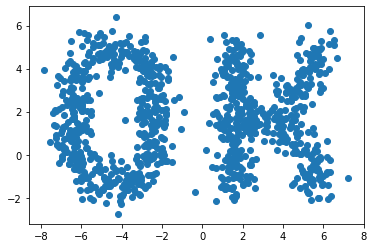

In [43]:
plt.scatter(use.V13,use.V21)

I think this is ok 😁